In [ ]:
#Proje 2 Kredi Alabilir mi?

"""
Hedef:
--->Kişinin gelir,yaş,borç gibi özelliklerine bakarak
kredi alabilir mi(1) veya alamaz mı(0) tahmini yapmak.

Bu proje Yapay sinir ağları ile çözeceğimiz binary sınıflandırma
problemidir.

TEKNOLOJİLER
-->Pandas/Numpy -> Veri İşleme
-->Scikit_learn ->veri seti, ön işleme, değerlendirme
-->Tensorflow/Keras -> Yapay Sinir Ağı modeli
-->Matplotlib/Seaborn ->Grafik


"""

'\nHedef:\n--->Kişinin gelir,yaş,borç gibi özelliklerine bakarak \nkredi alabilir mi(1) veya alamaz mı(0) tahmini yapmak.\n\nBu proje Yapay sinir ağları ile çözeceğimiz binary sınıflandırma \nproblemidir.\n\nTEKNOLOJİLER\n-->Pandas/Numpy -> Veri İşleme\n-->Scikit_learn ->veri seti, ön işleme, değerlendirme\n-->Tensorflow/Keras -> Yapay Sinir Ağı modeli\n-->Matplotlib/Seaborn ->Grafik\n\n\n'

In [ ]:
#GEREKLİ KÜTÜPHANELER

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#veri seti ön işleme

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#derin öğrenme için gerekli kütüphaneler

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
#Değerlendirme için


In [ ]:
from google.colab import files

# Dosya yükleme penceresini açar
uploaded = files.upload()


Saving credit_record.csv to credit_record.csv
Saving application_record.csv to application_record.csv


In [ ]:
"""
Elimizde müşterilerin
| Sütun Adı             | Açıklama                        |
| --------------------- | ------------------------------- |
| ID                    | Müşteri ID'si                   |
| CODE\_GENDER          | Cinsiyet                        |
| FLAG\_OWN\_CAR        | Araba sahibi mi?                |
| FLAG\_OWN\_REALTY     | Ev sahibi mi?                   |
| CNT\_CHILDREN         | Çocuk sayısı                    |
| AMT\_INCOME\_TOTAL    | Gelir                           |
| NAME\_INCOME\_TYPE    | Gelir türü (çalışan, emekli...) |
| NAME\_EDUCATION\_TYPE | Eğitim durumu                   |
| NAME\_FAMILY\_STATUS  | Medeni durumu                   |
| DAYS\_BIRTH           | Doğum günü (negatif değer)      |
| DAYS\_EMPLOYED        | Çalışma süresi                  |
| ...                   | vs.                             |


gibi verilerini tutan application.record.csv ve


| Sütun Adı       | Açıklama                                                           |
| --------------- | ------------------------------------------------------------------ |
| ID              | Müşteri ID'si                                                      |
| MONTHS\_BALANCE | Kredi geçmişi ay bilgisi                                           |
| STATUS          | Kredi durumu (0: zamanında, 1–5: gecikme, C: kapalı, X: bilgi yok) |


müşterilerin daha önce kredi kullnaıp kullanmadığıyla ilgili credit_record.csv

olmak üzere iki veri seti mevcut önce bu veri setlerini  içeri alıp önişleme s
sırasında bilrşetirmeye çalışacağız





"""

"\nElimizde müşterilerin \n| Sütun Adı             | Açıklama                        |\n| --------------------- | ------------------------------- |\n| ID                    | Müşteri ID'si                   |\n| CODE\\_GENDER          | Cinsiyet                        |\n| FLAG\\_OWN\\_CAR        | Araba sahibi mi?                |\n| FLAG\\_OWN\\_REALTY     | Ev sahibi mi?                   |\n| CNT\\_CHILDREN         | Çocuk sayısı                    |\n| AMT\\_INCOME\\_TOTAL    | Gelir                           |\n| NAME\\_INCOME\\_TYPE    | Gelir türü (çalışan, emekli...) |\n| NAME\\_EDUCATION\\_TYPE | Eğitim durumu                   |\n| NAME\\_FAMILY\\_STATUS  | Medeni durumu                   |\n| DAYS\\_BIRTH           | Doğum günü (negatif değer)      |\n| DAYS\\_EMPLOYED        | Çalışma süresi                  |\n| ...                   | vs.                             |\n\n\ngibi verilerini tutan application.record.csv ve \n\n\n| Sütun Adı       | Açıklama                 

In [ ]:
#veri setlerini dataframe e çekme

import pandas as pd

app_df = pd.read_csv("application_record.csv")
#müşteri bilgilerinin atanması

credit_df = pd.read_csv("credit_record.csv")
#daha önce kullandıysa kredi bilgileri


print("Application Veri Seti:")
#ilk  bir kaç satırı görüntüleme
display(app_df.head())

print("Credit Veri Seti:")
display(credit_df.head())

Application Veri Seti:


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


Credit Veri Seti:


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
"""
credit_record içerisnde düzenlemeler yapaacığz

en riskli durumun tespiti

gecikme yoksa 1 kredi alabilir varsa 0 yüksek riksli şeklinde
etiket sütunu oluşturacağız(TARGET)

"""
# Önce kredi durumundaki eşsiz değerleri görelim
print("Eşsiz kredi durumları (STATUS):", credit_df["STATUS"].unique())


Eşsiz kredi durumları (STATUS): ['X' '0' 'C' '1' '2' '3' '4' '5']


In [ ]:
#Her müşteri için en kötü durumların bulunup etiketlenmesi




status_summary = credit_df.groupby("ID")["STATUS"].apply(lambda x: ''.join(set(x)))
#her id için en kötü durumu bulur daha sonra içlerinden en kötüsünü bulur

#gecikmeli ödemesi olup olmadığına bakan fonksiyon
def is_good_credit(statur_str):

  for risk in ['1','2','3','4','5']:

    if risk in statur_str:# riskli müşteri tespiti

      return 0

  return 1 #güvenilir müşteri


credit_status = status_summary.apply(is_good_credit).reset_index()
#tüm müşterilere etiket atılması

credit_status.columns = ["ID","TARGET"]


credit_status.head()

#Her müşterinin kredi durumu target sütunu oluşturulup sonuçlar yazıldı

,ID,TARGET
0,5001711,1
1,5001712,1
2,5001713,1
3,5001714,1
4,5001715,1


In [ ]:
#Setlerin Birleştirilmesi

merged_df = pd.merge(app_df, credit_status, on = "ID")
# id lere göre veri setlerinin birleştirilmesi

merged_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,TARGET
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1


In [ ]:
#Kontrol: Hedef Değerlerin dağılımı

#burada veri setinden bozukluk gelip gelmediğini kontrol edeceğiz
#sağlıklı çalışma için önemlidir

merged_df["TARGET"].value_counts()
# 0 = Riskli müşteri, 1 = Güvenilir müşteri

,count
TARGET,
1,32166
0,4291


In [ ]:
#ÖNİŞLEME ve VERİ SETİ TEMİZLİĞİ

columns_to_drop = [


    'ID',
    'FLAG_MOBIL',
    'FLAG_WORK_PHONE',
    'FLAG_PHONE',
    'FLAG_EMAIL',
    'OCCUPATION-TYPE'
]

merged_df.drop(columns = [col for col in columns_to_drop if col in merged_df.columns],axis=1,inplace=True)

# Sütunları düşürme

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          36457 non-null  object 
 1   FLAG_OWN_CAR         36457 non-null  object 
 2   FLAG_OWN_REALTY      36457 non-null  object 
 3   CNT_CHILDREN         36457 non-null  int64  
 4   AMT_INCOME_TOTAL     36457 non-null  float64
 5   NAME_INCOME_TYPE     36457 non-null  object 
 6   NAME_EDUCATION_TYPE  36457 non-null  object 
 7   NAME_FAMILY_STATUS   36457 non-null  object 
 8   NAME_HOUSING_TYPE    36457 non-null  object 
 9   DAYS_BIRTH           36457 non-null  int64  
 10  DAYS_EMPLOYED        36457 non-null  int64  
 11  OCCUPATION_TYPE      25134 non-null  object 
 12  CNT_FAM_MEMBERS      36457 non-null  float64
 13  TARGET               36457 non-null  int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 3.9+ MB


In [ ]:
#Kategorik Sütunları Sayısala Çevirme(Encoding)

categorical_cols = merged_df.select_dtypes(include='object').columns.tolist()
#Kategorik verilerin seçilmesi

merged_df_encoded = pd.get_dummies(merged_df,columns=categorical_cols, drop_first=True)
#encoding uygulama

print("Yeni sütun sayısı:",merged_df_encoded.shape[1])
merged_df_encoded.head()

Yeni sütun sayısı: 43


,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,TARGET,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,0,427500.0,-12005,-4542,2.0,0,True,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,427500.0,-12005,-4542,2.0,0,True,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0,112500.0,-21474,-1134,2.0,1,True,True,True,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,0,270000.0,-19110,-3051,1.0,1,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,0,270000.0,-19110,-3051,1.0,1,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
#SAyısal verilerin ölçeklenmesi

from sklearn.preprocessing import StandardScaler

X= merged_df_encoded.drop("TARGET",axis=1)
y=merged_df_encoded["TARGET"]
#hedef değişkenlerin atanması

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)
#eğtitim ve test verisi ayarlanması

scaler=StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#sayısal değerlerin ölçeklenmesi

In [ ]:
#Model Tanımlama

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
#katmanlı modeller oluşturma

model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
#giriş gizli katmanı

model.add(Dense(32, activation='relu'))
#ikinci gizli katman

model.add(Dense(16,activation='relu'))
#üçüncü gizli katman

model.add(Dense(1,activation='sigmoid'))
#çıktı katmanı  binary classifitaion-->sigmoid



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Modeli Derleme

model.compile(

    optimizer='adam',    #ağırlıkları her seferinde güncellyen algoritma
    loss='binary_crossentropy', # 0/1 sınıflandırma için
    metrics=['accuracy'] # doğruluk oranını takip et
)

In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Sınıf ağırlıklarını otomatik hesapla
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Sözlük haline getir
class_weights = {0: weights[0], 1: weights[1]}

print("Sınıf ağırlıkları:", class_weights)


Sınıf ağırlıkları: {0: np.float64(4.265136004679731), 1: np.float64(0.5663986638701157)}


In [ ]:
#Model Eğitimi

history = model.fit(
    X_train_scaled,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    class_weight=class_weights   # 🟢  burası eklendi
)



Epoch 1/20
821/821 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6923 - loss: 0.6309 - val_accuracy: 0.6798 - val_loss: 0.6059
Epoch 2/20
821/821 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6922 - loss: 0.5835 - val_accuracy: 0.6058 - val_loss: 0.6807
Epoch 3/20
821/821 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7086 - loss: 0.5568 - val_accuracy: 0.6712 - val_loss: 0.6111
Epoch 4/20
821/821 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6999 - loss: 0.5624 - val_accuracy: 0.6054 - val_loss: 0.6735
Epoch 5/20
821/821 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7219 - loss: 0.5408 - val_accuracy: 0.6921 - val_loss: 0.5919
Epoch 6/20
821/821 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7095 - loss: 0.5463 - val_accuracy: 0.7089 - val_loss: 0.5860
Epoch 7/20
821/821 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7110 - loss: 0.5545 - val_accuracy: 0.7086 - val_loss: 0.5758
Epoch 8/20
821/821 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7160 - loss: 0.5401 - val_accuracy: 0.

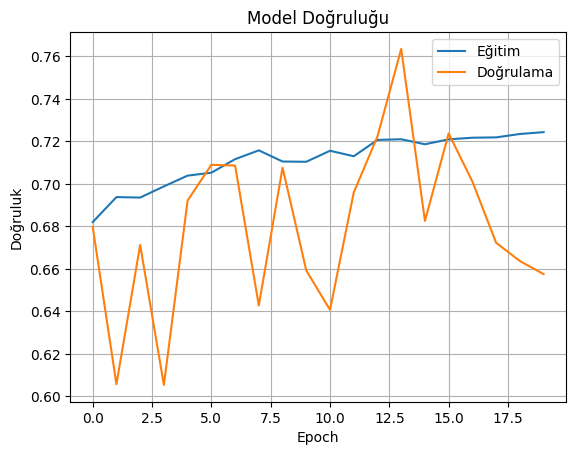

In [ ]:
#Doğruluk Görselleştirme

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label='Eğitim')
plt.plot(history.history['val_accuracy'],label='Doğrulama')
plt.title('Model Doğruluğu')
plt.ylabel('Doğruluk')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Modeli Test Etme

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_prob=model.predict(X_test_scaled)
y_pred= (y_pred_prob>0.5).astype(int)
#tahminler 0.5 üstü ise 1 kabul etmek için

print("Test Doğruluğu:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step
Test Doğruluğu: 0.6456390565002743
Confusion Matrix:
 [[ 535  337]
 [2247 4173]]
Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.61      0.29       872
           1       0.93      0.65      0.76      6420

    accuracy                           0.65      7292
   macro avg       0.56      0.63      0.53      7292
weighted avg       0.84      0.65      0.71      7292



In [ ]:
"""
Modelin doğruluk oranı yüksek %88 ancak veri
Recall çok düşük → Yani gerçek riskli müşterileri yakalayamıyor

F1-score = 0.09 → Bu sınıf için model başarısız

bunun için class weight ağırlığını kullnıp tekrar model eğitimi yapcağız

Bu sayede model az sayıda bulunan riskli müşterilere özen gösterecek

"""

In [ ]:
#class weight ekledikten sonra accuracy düştü ancak daha güvenilir bir model elde ettik
#çünkü model artık her şeye 1 demiyor riskli müşterileri daha az kaçırıyor